# Scene classification

**Import the relevant libraries**

In [1]:
path = "../input/scene_classification/scene_classification/train/"

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
bs = 8

In [4]:
df = pd.read_csv('../input/scene_classification/scene_classification/train.csv')
df.head()

,image_name,label
0,0.jpg,0
1,1.jpg,4
2,2.jpg,5
3,4.jpg,0
4,7.jpg,4


In [5]:
tfms = get_transforms(flip_vert=False,max_zoom=1.0,max_warp=0.5)
data = (ImageList.from_csv(path, csv_name = '../train.csv') 
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '../test')              
        .transform(tfms, size=128)
        .databunch(num_workers=0))

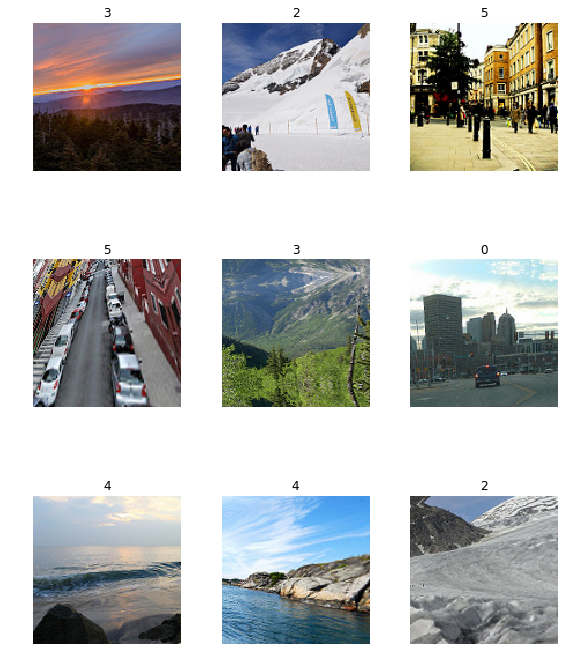

In [6]:
data.show_batch(rows=3, figsize=(8,10))

In [7]:
print(data.classes)

[0, 1, 2, 3, 4, 5]


In [8]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy], model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 81228524.73it/s]


In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.608058,0.355963,0.127716,0.872284,01:33
1,0.426372,0.290258,0.103347,0.896653,01:21
2,0.363372,0.255845,0.093365,0.906635,01:20
3,0.347577,0.251970,0.087493,0.912507,01:19


In [10]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

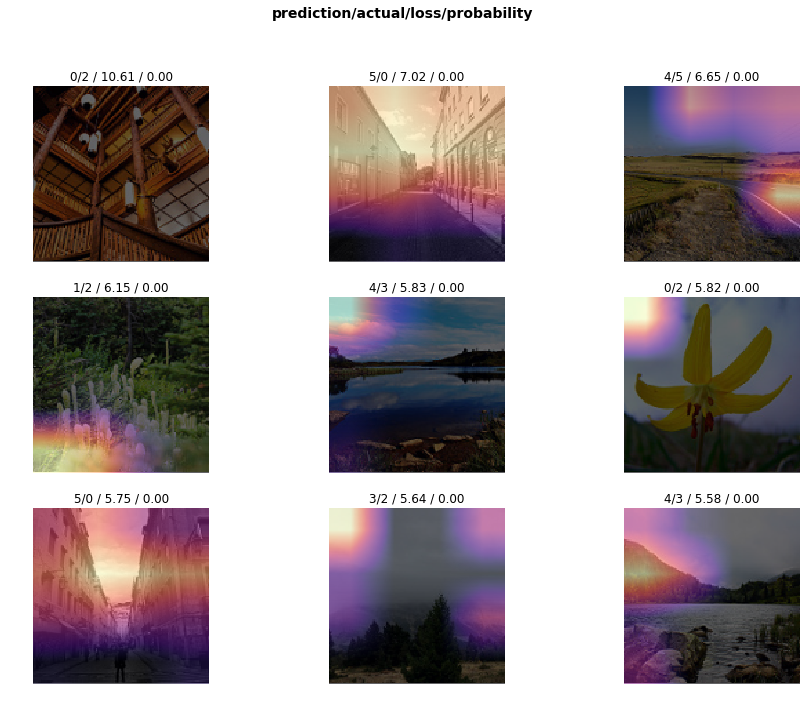

In [11]:
interp.plot_top_losses(9, figsize=(15,11))

In [12]:
interp.most_confused(min_val=2)

[(2, 3, 65),
 (3, 2, 57),
 (0, 5, 37),
 (5, 0, 32),
 (2, 4, 21),
 (3, 4, 13),
 (4, 2, 13),
 (4, 3, 10),
 (4, 0, 7),
 (5, 4, 7),
 (2, 0, 5),
 (0, 4, 4),
 (1, 3, 4),
 (2, 1, 4),
 (3, 0, 3),
 (4, 1, 3),
 (1, 4, 2),
 (2, 5, 2),
 (3, 5, 2),
 (5, 1, 2)]

In [13]:
learn.save('/kaggle/working/stage-1-34-128')

In [14]:
learn.unfreeze()

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


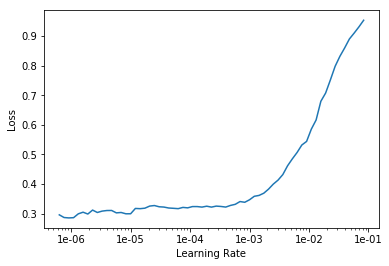

In [16]:
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.317253,0.243175,0.085144,0.914856,01:23
1,0.291823,0.224491,0.076336,0.923664,01:24
2,0.289194,0.216584,0.074281,0.925719,01:24
3,0.267654,0.217083,0.072519,0.927481,01:23


In [18]:
learn.save('/kaggle/working/stage-2-34-128')

**Changing image resolution to 256**

In [19]:
tfms = get_transforms(flip_vert=False,max_zoom=1.0,max_warp=0.5)
data = (ImageList.from_csv(path, csv_name = '../train.csv') 
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '../test')              
        .transform(tfms, size=256)
        .databunch(num_workers=0))

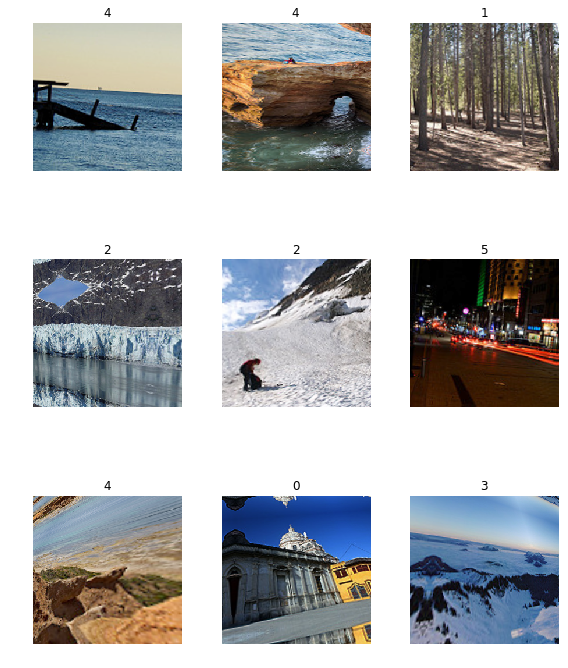

In [20]:
data.show_batch(rows=3, figsize=(8,10))

This time instead of loading a pretrained model we will load our model trained on size 64

In [21]:
learn.load('/kaggle/working/stage-2-34-128')

Learner(data=ImageDataBunch;

Train: LabelList (13628 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
4,5,4,1,5
Path: ../input/scene_classification/scene_classification/train;

Valid: LabelList (3406 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
0,4,0,0,0
Path: ../input/scene_classification/scene_classification/train;

Test: LabelList (7301 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: ../input/scene_classification/scene_classification/train, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, str

In [22]:
learn.unfreeze()

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


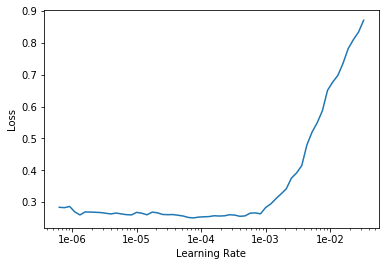

In [24]:
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.248455,0.212746,0.072813,0.927187,01:23
1,0.241865,0.211005,0.072813,0.927187,01:23
2,0.235703,0.200746,0.066941,0.933059,01:22
3,0.220982,0.199332,0.065473,0.934527,01:21


In [26]:
learn.save('/kaggle/working/stage-1-34-256')

In [27]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


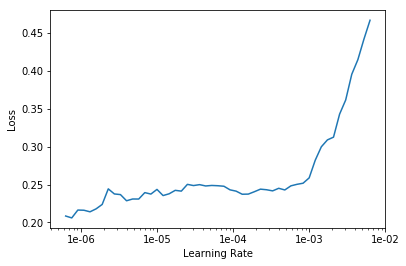

In [28]:
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.219912,0.198378,0.066060,0.933940,01:21
1,0.218692,0.194535,0.063418,0.936583,01:21
2,0.195389,0.195504,0.064298,0.935702,01:21
3,0.197071,0.191730,0.062830,0.937170,01:21


In [30]:
learn.save('/kaggle/working/stage-2-34-256')

In [31]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


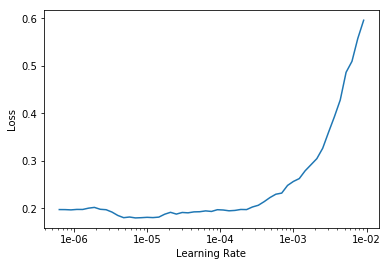

In [32]:
learn.recorder.plot()

In [33]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.198458,0.191365,0.064885,0.935115,01:21
1,0.204332,0.190923,0.060775,0.939225,01:24


In [34]:
learn.save('/kaggle/working/stage-3-34-256')